In [6]:
import pandas as pd
import dateutil
import os
import glob
import matplotlib as plt
import seaborn as sns
import numpy as np
import math

In [7]:
def time(x):
    stepmin = x["Step"].min()
    stepmax = x["Step"].max()
    return pd.Series([stepmin, stepmax], index=["First_oc", "Last_oc"])

In [16]:
path = '../simulation_output/output'
d = []
duration_data = []
group_durations = []
# Set a minimum duration of 10 seconds
min_duration = 10
# Over "Duration" minutes, a groups of 2 were formed, b groups of 3, c groups of 4 etc
group_sizes_to_duration = np.empty(100)

num_cars = 0
average_num_groups = 0

In [20]:
for filename in glob.glob(os.path.join(path, '*.csv')):
    try:
        data = pd.read_csv(filename, delimiter=',', header=0, encoding='ascii',index_col=False )
        duration_data = data.groupby(["ID"]).apply(time)
        
        #duration of a car trip in minutes
        car_duration = (data["Step"].max()- data["Step"].min()) / 60
        print(car_duration)
        num_groups = 0
        for index, row in duration_data.iterrows():
            A1 = index
            start = row["First_oc"]
            end = row["Last_oc"]
            duration = end - start
            if duration < min_duration:
                continue
            start_vehicles  = data[data["Step"] == start]
            #start_vehicles = start_vehicles.groupby().apply(time)
            start_vehicles = pd.merge(start_vehicles, duration_data, how="left", on="ID")
            start_vehicles = start_vehicles[["ID", "First_oc", "Last_oc"]]
            start_vehicles["First_oc"] = start_vehicles["First_oc"].apply(lambda x: max(x, start))
            start_vehicles["Last_oc"] = start_vehicles["Last_oc"].apply(lambda x: min(x, end))
            start_vehicles = start_vehicles.groupby(["Last_oc"], as_index=False).count()
            start_vehicles = start_vehicles[["Last_oc", "ID"]]
            start_vehicles = start_vehicles.rename(columns={"Last_oc": "Duration", "ID":"Group_size"})
            start_vehicles["Duration"] = start_vehicles["Duration"].apply(lambda x: x - start)
            start_vehicles = start_vehicles.sort_values(by=["Duration"], ascending=False)
            start_vehicles["Group_size"] = start_vehicles["Group_size"].cumsum()
            start_vehicles = start_vehicles[start_vehicles["Duration"] > min_duration]
            
            # Count the number of groups that have lasted longer than min duration 
            num_groups += start_vehicles["Duration"].size
            # Calculate the number of new combinations (subtract the preexisting combinations)
            # min_gs = start_vehicles["Group_size"].min() - 1
            # max_gs = start_vehicles["Group_size"].max()
            '''for group_size in range(2, 11):    
                if max_gs < group_size:
                    # No group of size group_size or larger can be formed 
                    break
                tot_combs = math.comb(max_gs, group_size)
                old_combs = 0
                if min_gs >= group_size:
                    old_combs = math.comb(min_gs, group_size)
                new_combs = tot_combs - old_combs
                print(new_combs)
            '''
            # print(start_vehicles)
            
            
            group_durations.append(start_vehicles)
        average_num_groups += num_groups / car_duration
        num_cars += 1
    except(OSError):
        print("The file that was expected was not found")
total_average = average_num_groups/num_cars

#Result: average number of groups per minute
print("Total average")
total_average

11.125
10.229166666666666
5.429166666666666
9.141666666666667
8.804166666666667
3.3833333333333333
5.270833333333333
13.6875
1.3
14.133333333333333
10.2625
15.495833333333334
0.17916666666666667
14.770833333333334
5.429166666666666
0.85
15.079166666666667
6.541666666666667
10.2625
7.375
11.254166666666666
16.15
10.2625
8.333333333333334
0.09166666666666666
7.141666666666667
13.158333333333333
10.358333333333333
5.15
16.954166666666666
9.770833333333334
10.358333333333333
2.1625
11.295833333333333
12.354166666666666
1.5083333333333333
10.2625
3.1416666666666666
8.6375
10.2625
13.766666666666667
10.925
11.825
2.629166666666667
9.745833333333334
5.158333333333333
10.2625
5.6375
11.804166666666667
9.6125
2.6458333333333335
9.733333333333333
6.020833333333333
10.070833333333333
5.254166666666666
14.1125
4.083333333333333
4.616666666666666
11.2375
12.158333333333333
1.4291666666666667
3.9291666666666667
9.108333333333333
5.5125
7.1375
8.641666666666667
0.18333333333333332
11.658333333333333


12.528257063668892

In [130]:
frame = pd.concat(group_durations, axis=0, ignore_index=True)
frame

,Duration,Group_size
0,0.9375,6
1,5.1875,17
2,4.3750,18
3,3.0625,20
4,2.1875,21
5,8.5000,10
6,7.3125,11
7,7.1250,12
8,6.8750,13
9,3.5625,14


In [129]:
shift = frame.apply(lambda x: x + 1)
shift = shift.sort_values(by=["Group_size"])
shift
min_size = shift["Group_size"].min()
max_size = shift["Group_size"].max()
limited = shift[shift["Duration"] > 1]
limited = limited[limited["Duration"] < 180]
limited

,Duration,Group_size
11734,38.0625,2
30679,1.8125,2
12070,5.3750,2
12071,5.1250,2
17599,44.0000,2
12072,5.6875,2
21880,128.1875,2
30675,20.6875,2
27419,2.0625,2
33281,19.1875,2


In [124]:
#Average duration of groups by size
averaged = limited.groupby(["Group_size"], as_index=False).mean()
averaged

,Group_size,Duration
0,2,38.817266
1,3,27.415848
2,4,21.615747
3,5,19.371577
4,6,16.666241
5,7,15.612836
6,8,14.578036
7,9,13.955234
8,10,12.962046
9,11,13.496655


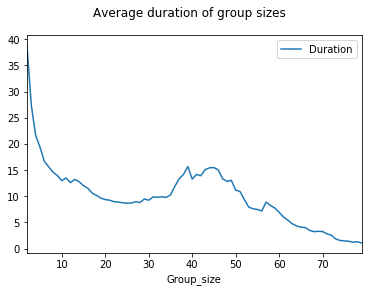

In [126]:
sns.set()
plot = averaged.plot(x="Group_size", y ="Duration")
fig = plot.get_figure()
fig.suptitle("Average duration of group sizes")
fig.savefig("../postprocessing_output/average_duration_over_group_size.png")

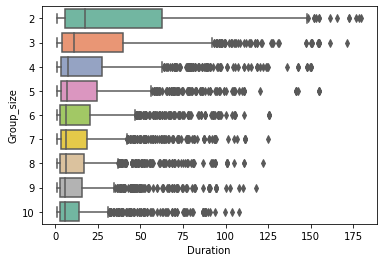

In [145]:
group_size_limited= limited[limited["Group_size"] < 11]
ax = sns.boxplot(x="Duration", y="Group_size", data=group_size_limited, orient="h", palette="Set2")
fig = ax.get_figure()
fig.savefig("../postprocessing_output/average_duration_over_group_size_boxplot.png")

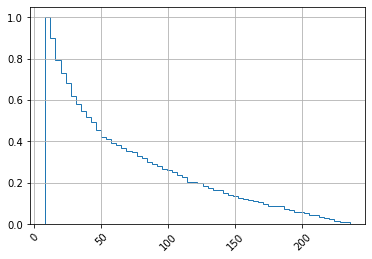

In [109]:
duration_i = limited[limited["Group_size"] == 2].Duration
#print(duration_i)
plot = duration_i.hist(bins=60, xrot=45, histtype='step', cumulative=-1, density=True)
fig = plot.get_figure()

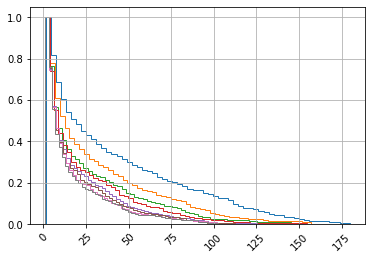

In [142]:
for i in range (min_size, min(10, max_size + 1)):
    #print("Distribution of group of size %d" % (i))
    duration_i = limited[limited["Group_size"] == i].Duration
    #print(duration_i)
    plot = duration_i.hist(bins=60, xrot=45, histtype='step', cumulative=-1, density=True)
    fig = plot.get_figure()


Text(0.5, 0.98, 'Group size analysis')

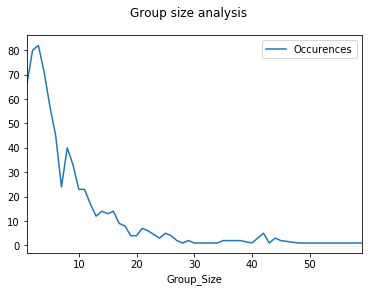

In [25]:
plot = counts.plot(x="Group_Size", y="Occurences")
fig = plot.get_figure()
fig.suptitle("Group size analysis")
#plot.legend(loc='upper right', shadow=True, ncol=1)

In [85]:
fig.savefig("../postprocessing_output/group_size_opposite_lane_20200505_1547.png")

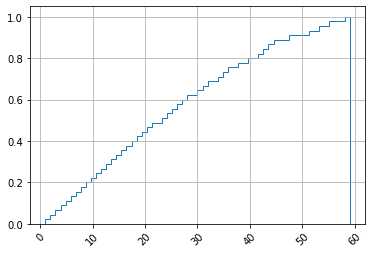

In [30]:
plot = frame.Group_Size.hist(bins=60, xrot=45, histtype='step', cumulative=True, density=True)
fig = plot.get_figure()

In [31]:
fig.savefig("../postprocessing_output/group_size_opposite_lanes_cdf_20200505_1547.png")